<a href="https://colab.research.google.com/github/Praveen5612/ML_Algorithams/blob/main/Naive_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/sample_data/SMSSpamCollection', sep='\t', header=None, names=['label', 'message'])

In [ ]:
data.shape

(5572, 2)

In [ ]:
data.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
data.isnull().sum()

,0
label,0
message,0


In [ ]:
data.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
5567,False
5568,False
5569,False
5570,False


In [ ]:
y = data['label']
x = data['message']

In [ ]:
print(x[:5])
print(y[:5])

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
Name: message, dtype: object
0     ham
1     ham
2    spam
3     ham
4     ham
Name: label, dtype: object


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=5)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(4457,)
(1115,)
(4457,)
(1115,)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf  = TfidfVectorizer()
x_num = tfidf.fit_transform(x_train)
x_test = tfidf.transform(x_test)

In [ ]:
from sklearn.preprocessing import LabelEncoder
Le = LabelEncoder()
y_train = Le.fit_transform(y_train)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(x_num,y_train)

MultinomialNB()

In [ ]:
y_pred = model.predict(x_test)
y_test = Le.transform(y_test)
print(y_pred[:5])

[1 0 1 0 0]


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.95695067264574
[[970   0]
 [ 48  97]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.98       970
           1       1.00      0.67      0.80       145

    accuracy                           0.96      1115
   macro avg       0.98      0.83      0.89      1115
weighted avg       0.96      0.96      0.95      1115



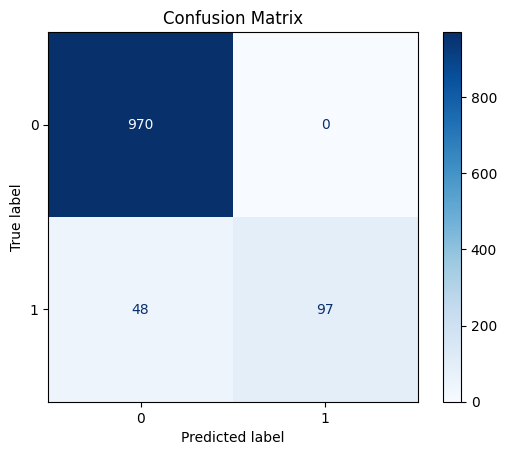

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(model, x_test, y_test, cmap='Blues')
plt.title("Confusion Matrix")
plt.show()